# PHISHING WEBSITES DETECTOR MODEL

PROBELM STATEMENT / OBJECTIVE:
    Phishing is a technique used to attempt to obtain personal information through websites that look like the legimate 
    website but isnt the actual website hence deceiving the users into giving away their credentials.
    The Task is to develope a Machine Learning Model capable of predicting a given website if its is a phising website 
    or not using Natural Language Processing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import os
import itertools
from wordcloud import WordCloud

What is our dataset?

In [2]:
data = pd.read_csv(r"phishing_site_urls.csv")  #Read the dataset 

In [3]:
datac=data.copy() #Made a copy of the data to experiment so that we dont harm the actual dataset

In [4]:
datac.head(30)   # So we basically have URLs and if they are Bad or Good

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [5]:
datac.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [6]:
datac.shape

(549346, 2)

In [7]:
datac.count()  #500000+ is a huge dataset , hence more accurate results

URL      549346
Label    549346
dtype: int64

In [8]:
datac.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [9]:
datac['URL'].nunique()

507195

In [10]:
549346-507195
#So there are these many duplicate values 

42151

In [11]:
datac[datac.duplicated('URL', keep=False)].value_counts()


URL                                             Label
jhomitevd2abj3fk.onion.to/                      bad      52
jhomitevd2abj3fk.tor2web.org/                   bad      52
zjfq4lnfbs7pncr5.onion.to/                      bad      44
zjfq4lnfbs7pncr5.tor2web.org/                   bad      44
5n7y4yihirccftc5.tor2web.org/                   bad      42
                                                         ..
escueladeparapente.cl/doc/docu/pvalidate.html   bad       2
escueladeparapente.cl/doc/docu/processing.html  bad       2
escpwip.hqtdmcdritpwz.ml:41955/anymore/em1sZWI  bad       2
kathollowell.com/6obllz                         bad       2
tommyhumphreys.com/                             good      1
Length: 34924, dtype: int64

In [12]:
datac[datac['URL']=='jhomitevd2abj3fk.onion.to/'].count() #t

URL      52
Label    52
dtype: int64

In [13]:
# Now we can clearly see that duplicates like these exist so we drop all the 52 in this instance but 1 so 51 are dropped
datac.drop_duplicates(subset='URL', keep='first', inplace=True)


In [14]:
datac[datac.duplicated('URL', keep=False)].count()
#Hence the duplicate probelm is solved

URL      0
Label    0
dtype: int64

In [15]:
datac.isnull().sum()

URL      0
Label    0
dtype: int64

In [16]:
# There is no Null As Well so we can proceed to analyzing the URLS

In [17]:
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [18]:
datac['Label'].value_counts()

good    392897
bad     114298
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

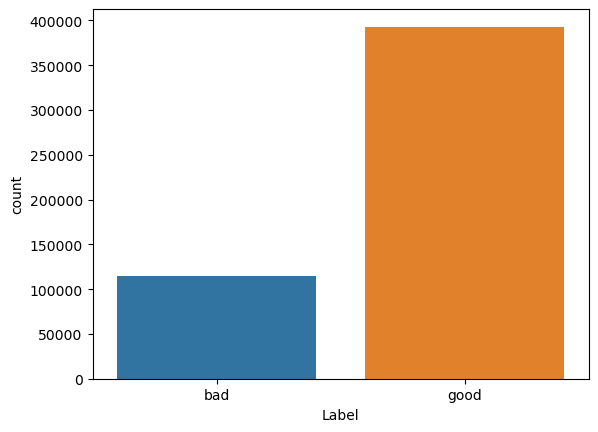

In [19]:
sns.countplot(x="Label",data=datac)

In [20]:
#data[data['Label']=='bad'].count()
badurls = datac[datac['Label'] == 'bad']['URL'].tolist()
badurls

['nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526',
 'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php',
 'serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/',
 'mail.printakid.com/www.online.americanexpress.com/index.html',
 'thewhiskeydregs.com/wp-content/themes/widescreen/includes/temp/promocoessmiles/?84784787824HDJNDJDSJSHD//2724782784/',
 'smilesvoegol.servebbs.org/voegol.php',
 'premierpaymentprocessing.com/includes/boleto-2via-07-2012.php',
 'myxxxcollection.com/v1/js/jih321/bpd.com.do/do/l.popular.php',
 'super1000.info/docs',
 'horizonsgallery.com/js/bin/ssl1/_id/www.paypal.com/fr/cgi-bin/webscr/cmd=_registration-run/login.php?cmd=_login-run&am

<function matplotlib.pyplot.show(close=None, block=None)>

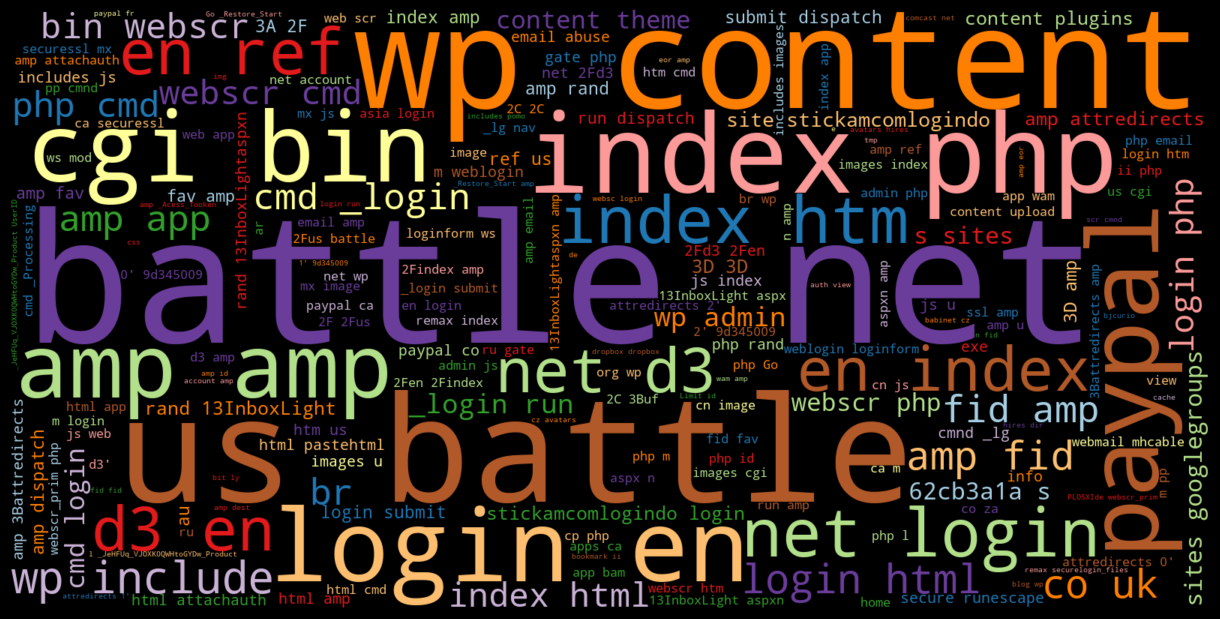

In [21]:
# THE LARGER AND BRIGHTER THE WORD OCCURS MORE THE FRQUENCY
# SO HERE LARGER AND BRIGHTER THE WORD HAS APPREARED , MORE PROBABLE
# IT IS TO BE A PHISING WEBSITE
phish_url= " ".join(i for i in badurls)
wordcloud=WordCloud(width=1600 , height = 800 , colormap='Paired').generate(phish_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

In [22]:
goodurls = datac[datac['Label'] == 'good']['URL'].tolist()
goodurls

["esxcc.com/js/index.htm?us.battle.net/noghn/en/?ref5M+9d'bbws&b`|tNEfnud&d\xad\rÅj\x8fYÖJ\x15p\x94\x92lR+CmP \x0c!\x10¡6\x96Ô~PÖtÓ\x9e¶P8~·Äëi\x0f\x12q°ôß|±½$~.ë½\x1fü·ÝjQ³dì÷VTø\x04\x06srDiG[\x80v\x15' éò\x12å¯ê\x02YÃ\x8eò\x84\x7f«Ù¾FkþàâFV#àÐØ\x94}Ú\x0b\x83¨\x08%¡\x9a\x90x(My¼RçÁs\t²¹ù#Õ\x15¦kI\x11çzb\x7fTUùØ9\x88ÂEm© ÁqÚ'lMJ\x92!c<E\x8a§æèÉ§¹\x82ü\x85el#ñ\xad\x9e·Låß¯¥=\x9b\x12\x97ºxÌ\x03üHÖÞþ¼¸^'](6¼\x1a!¦\x117jôu\xa0´GÔiP°Û¶\x9cÆ±È\x01>9o¼°iìTvµD\x83Ã%&£.\x90k\x10&Ï\x9dXO\x1d\x81O¾O©ªØ¤ÉÂ0¾cÄ²¿\rHi±æáÐ\\\x1a/'\x9b¡!¿F#\t?ì.:\x15â±¾«\x10æD\x85ô\x841]Íµ¬6\xa0\x8bãê¤G;\x81Ê\x16ö2°ï¾øPü·\x8b}9÷ð\x99IP=\x86â\n\x8eVz3¹ó¬éíA\x08\x8c vwK\x8c}·Áªí_S¢D\x07\x837NØØòa0úqÞ\x96ñ\x0c\x98f½tjÓµ»w2xhçt\x9f\\I^u\x96\x80Æ\x8a\x9c!¯ì½ú\xa0°S\x01CYïõJï£l\x1ad\x19:6Õ±Ç4\x04\x08»ê\x1bRùú\x11#Òuü@^6\x96amp;offerId=newmail-en-us-v2&amp;siteState=ver:4",
 "www\x0eeira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùu\x03Ë\nÓ\x176(rTÃ\x06u\x0f\x8f\x7fæ\x82\x0c\x99=g\x810¾\x96÷mÖi\x12Ó-;\x9bXZ\\%êýü\x05Éfn&\x87\\°%7õÙ:¹u\x96\

<function matplotlib.pyplot.show(close=None, block=None)>

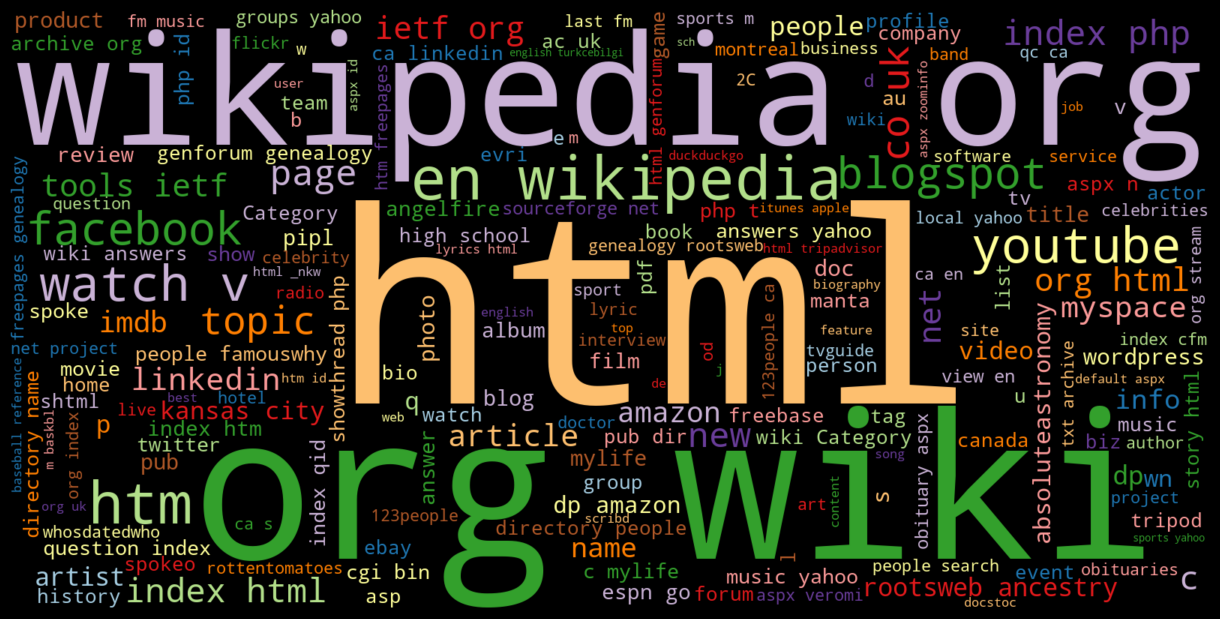

In [23]:
phish_url2= " ".join(i for i in goodurls)
wordcloud2=WordCloud(width=1600 , height = 800 , colormap='Paired').generate(phish_url2)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

FEATURE ENGINEERING

SEGMENTATION : Break Into Sentences  
TOKENIZATION : Break into Words/tokens  
Get rid of non essential words (Stop words)  
STEMMING : Identifying and Grouping Variations of Same Word  
LEMMATIZATION : Identifying anf grouping Based on category like gender  
MODELLING AND TRAINING   


In [24]:
bad_urlz = datac.loc[data['Label'] == 'bad', 'URL'].iloc[0]
bad_urlz


'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [25]:
good_urlz = datac.loc[data['Label'] == 'good', 'URL'].iloc[0]
good_urlz

"esxcc.com/js/index.htm?us.battle.net/noghn/en/?ref5M+9d'bbws&b`|tNEfnud&d\xad\rÅj\x8fYÖJ\x15p\x94\x92lR+CmP \x0c!\x10¡6\x96Ô~PÖtÓ\x9e¶P8~·Äëi\x0f\x12q°ôß|±½$~.ë½\x1fü·ÝjQ³dì÷VTø\x04\x06srDiG[\x80v\x15' éò\x12å¯ê\x02YÃ\x8eò\x84\x7f«Ù¾FkþàâFV#àÐØ\x94}Ú\x0b\x83¨\x08%¡\x9a\x90x(My¼RçÁs\t²¹ù#Õ\x15¦kI\x11çzb\x7fTUùØ9\x88ÂEm© ÁqÚ'lMJ\x92!c<E\x8a§æèÉ§¹\x82ü\x85el#ñ\xad\x9e·Låß¯¥=\x9b\x12\x97ºxÌ\x03üHÖÞþ¼¸^'](6¼\x1a!¦\x117jôu\xa0´GÔiP°Û¶\x9cÆ±È\x01>9o¼°iìTvµD\x83Ã%&£.\x90k\x10&Ï\x9dXO\x1d\x81O¾O©ªØ¤ÉÂ0¾cÄ²¿\rHi±æáÐ\\\x1a/'\x9b¡!¿F#\t?ì.:\x15â±¾«\x10æD\x85ô\x841]Íµ¬6\xa0\x8bãê¤G;\x81Ê\x16ö2°ï¾øPü·\x8b}9÷ð\x99IP=\x86â\n\x8eVz3¹ó¬éíA\x08\x8c vwK\x8c}·Áªí_S¢D\x07\x837NØØòa0úqÞ\x96ñ\x0c\x98f½tjÓµ»w2xhçt\x9f\\I^u\x96\x80Æ\x8a\x9c!¯ì½ú\xa0°S\x01CYïõJï£l\x1ad\x19:6Õ±Ç4\x04\x08»ê\x1bRùú\x11#Òuü@^6\x96amp;offerId=newmail-en-us-v2&amp;siteState=ver:4"

Since The Urls already already individual sentences we skip that
Now for Tokentization we gonna use the following

NLTK Word Tokenize
NLTK (Natural Language Toolkit) is an open-source Python library for Natural Language Processing. It has easy-to-use interfaces for over 50 corpora and lexical resources such as WordNet, along with a set of text processing libraries for classification, tokenization, stemming, and tagging.



In [26]:
from nltk.tokenize import RegexpTokenizer 

In [27]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
datac['Url_tokenized'] = datac.URL.map(lambda t: tokenizer.tokenize(t))

In [28]:
datac.head()


,URL,Label,Url_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


Stemming : 

    Inflection is the process through which a word is modified to communicate many grammatical categories, including tense, case, voice, aspect, person, number, gender, and mood. Thus, although a word may exist in several inflected forms, having multiple inflected forms inside the same text adds redundancy to the NLP process.

As a result, we employ stemming to reduce words to their basic form or stem, which may or may not be a legitimate word in the language.

For instance, the stem of these three words, connections, connected, connects, is “connect”.


This article was published as a part of the Data Science Blogathon.

Introduction
We will learn how to do stemming in Python using the NLTK package for our NLP project in this lesson. We shall provide an overview of stemming and trace its history. Finally, we will discuss several kinds of stemmers and various applications of stemming in NLTK.

What is Stemming?
Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization.

According to Wikipedia, inflection is the process through which a word is modified to communicate many grammatical categories, including tense, case, voice, aspect, person, number, gender, and mood. Thus, although a word may exist in several inflected forms, having multiple inflected forms inside the same text adds redundancy to the NLP process.

As a result, we employ stemming to reduce words to their basic form or stem, which may or may not be a legitimate word in the language.

For instance, the stem of these three words, connections, connected, connects, is “connect”. On the other hand, the root of trouble, troubled, and troubles is “troubl,” which is not a recognized word.

1. Snowball Stemmer – SnowballStemmer()
Martin Porter also created Snowball Stemmer. The method utilized in this instance is more precise and is referred to as “English Stemmer”
SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique

2. Lancaster Stemmer – LancasterStemmer()
Lancaster Stemmer is straightforward, although it often produces results with excessive stemming. Over-stemming renders stems non-linguistic or meaningless.

LancasterStemmer() is a module in NLTK that implements the Lancaster stemming technique.

In [29]:
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')
lancaster = LancasterStemmer()

In [30]:
datac['Lancaster_Stemmed'] = datac['Url_tokenized'].apply(lambda x: [lancaster.stem(word) for word in x])

In [31]:
datac['Snowball_Stemmed'] = datac['Url_tokenized'].apply(lambda x: [snowball.stem(word) for word in x])

In [32]:
from googlesearch import search
def google_index(url):
    site= search(url,5)
    return 1 if site else 0
datac['google_index']=datac['URL'].apply(lambda i:google_index(i))
datac.head()

,URL,Label,Url_tokenized,Lancaster_Stemmed,Snowball_Stemmed,google_index
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skyp, ...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, payp, co, uk, cycg, bin, w...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosby, com, payp, cgi, bin, get, into, ...","[serviciosbi, com, paypal, cgi, bin, get, into...",1
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...","[mail, printakid, com, www, onlin, americanexp...",1
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, cont, them, widescre...","[thewhiskeydreg, com, wp, content, theme, wide...",1


In [33]:
datac['google_index'].value_counts()

1    507195
Name: google_index, dtype: int64

In [34]:
#google search index helps like if its index it may or maynot be fake
# but if it is not indexed it is fake

In [35]:
def count_https(url):
    return url.count('https')

def count_http(url):
    return url.count('http')

def count_com(url):
    return url.count('com')

def count_dot(url):
    return url.count('.')

def count_slash(url):
    return url.count('/')

def count_question(url):
    return url.count('?')

def count_equals(url):
    return url.count('=')

def count_underscore(url):
    return url.count('_')

def count_ampersand(url):
    return url.count('&')

def count_percent(url):
    return url.count('%');


In [36]:
datac['count_https']=datac['URL'].apply(lambda i : count_https(i))
datac['count_http']=datac['URL'].apply(lambda i : count_http(i))
datac['count_com']=datac['URL'].apply(lambda i : count_com(i))
datac['count_dot']=datac['URL'].apply(lambda i : count_dot(i))
datac['count_slash']=datac['URL'].apply(lambda i : count_slash(i))
datac['count_question']=datac['URL'].apply(lambda i : count_question(i))
datac['count_equals']=datac['URL'].apply(lambda i : count_equals(i))
datac['count_underscore']=datac['URL'].apply(lambda i : count_underscore(i))
datac['count_ampersand']=datac['URL'].apply(lambda i : count_ampersand(i))
datac['count_percent']=datac['URL'].apply(lambda i : count_percent(i))

In [37]:
datac.head()

,URL,Label,Url_tokenized,Lancaster_Stemmed,Snowball_Stemmed,google_index,count_https,count_http,count_com,count_dot,count_slash,count_question,count_equals,count_underscore,count_ampersand,count_percent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skyp, ...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",1,0,0,1,6,10,1,4,4,3,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, payp, co, uk, cycg, bin, w...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",1,0,0,1,5,4,0,2,1,1,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosby, com, payp, cgi, bin, get, into, ...","[serviciosbi, com, paypal, cgi, bin, get, into...",1,0,0,1,7,11,0,0,0,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...","[mail, printakid, com, www, onlin, americanexp...",1,0,0,2,6,2,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, cont, them, widescre...","[thewhiskeydreg, com, wp, content, theme, wide...",1,0,0,1,1,10,1,0,0,0,0


EXPERIMENTS ON MODELS AND FURTHER APPROACH : TEST 1 SNOWBALL + NLP LR

In [38]:
datatest1=datac.copy()

In [39]:
datatest1['SnowballStemJoin'] = datatest1['Snowball_Stemmed'].map(lambda l: ' '.join(l))

In [40]:
datatest1.sample()

,URL,Label,Url_tokenized,Lancaster_Stemmed,Snowball_Stemmed,google_index,count_https,count_http,count_com,count_dot,count_slash,count_question,count_equals,count_underscore,count_ampersand,count_percent,SnowballStemJoin
164231,dels.nas.edu/global/besr/Uranium,good,"[dels, nas, edu, global, besr, Uranium]","[del, nas, edu, glob, besr, uran]","[del, nas, edu, global, besr, uranium]",1,0,0,0,2,3,0,0,0,0,0,del nas edu global besr uranium


In [41]:
datatest1 = datatest1[['URL', 'Label', 'Url_tokenized', 'Snowball_Stemmed', 'SnowballStemJoin', 'Lancaster_Stemmed', 'google_index', 'count_https', 'count_http', 'count_com', 'count_dot', 'count_slash', 'count_question', 'count_equals', 'count_underscore', 'count_ampersand', 'count_percent']]


In [42]:
datatest1['Label'].value_counts()

good    392897
bad     114298
Name: Label, dtype: int64

In [43]:
bad_sites = datatest1[datatest1.Label == 'bad']
good_sites = datatest1[datatest1.Label == 'good']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()
feature = cv.fit_transform(datatest1.Snowball_Stemmed.astype(str))
feature[:5].toarray()
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(feature, datatest1.Label)

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9647394695541763

THERE FOR LOGISTIC REGRESSOR IN NLP PROCEDURE GIVES : 0.96 AS SCORE

EXPERIMENTAL TEST 2 : LACANSTER + NLP + LR

In [46]:
datatest2=datac.copy()

In [47]:
datatest2['LacansterStemJoin'] = datatest1['Lancaster_Stemmed'].map(lambda l: ' '.join(l))

In [48]:
datatest2.sample()

,URL,Label,Url_tokenized,Lancaster_Stemmed,Snowball_Stemmed,google_index,count_https,count_http,count_com,count_dot,count_slash,count_question,count_equals,count_underscore,count_ampersand,count_percent,LacansterStemJoin
35509,paypal.com.ca.cgi.bin.webscr.cmd.help.flow.9go...,bad,"[paypal, com, ca, cgi, bin, webscr, cmd, help,...","[payp, com, ca, cgi, bin, webscr, cmd, help, f...","[paypal, com, ca, cgi, bin, webscr, cmd, help,...",1,0,0,1,11,2,0,0,0,0,0,payp com ca cgi bin webscr cmd help flow gov l...


In [49]:
# column_list = list(datatest2.columns[:-1])  # Assuming you want all columns except th
# column_list

In [50]:
datatest2 = datatest2[['URL', 'Label', 'Url_tokenized','Lancaster_Stemmed', 'LacansterStemJoin', 'Snowball_Stemmed', 'google_index', 'count_https', 'count_http', 'count_com', 'count_dot', 'count_slash', 'count_question', 'count_equals', 'count_underscore', 'count_ampersand', 'count_percent']]

In [51]:
from sklearn.feature_extraction.text import CountVectorizer 
cv1 = CountVectorizer()
feature1 = cv1.fit_transform(datatest2.Lancaster_Stemmed.astype(str))
feature1[:5].toarray()
from sklearn.model_selection import train_test_split
trainX1, testX1, trainY1, testY1 = train_test_split(feature, datatest2.Label)

In [52]:
from sklearn.linear_model import LogisticRegression
lr1= LogisticRegression()
lr1.fit(trainX1,trainY1)
lr1.score(testX1,testY1)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9624366122761221

LANCASTER STEMMING METHOD MORE OR LESS GAVE SAME 0.9655


EXPERIMENT 3 : REMOVING STOP WORDS

In [53]:
datatest3=datac.copy()

In [54]:
datatest3.head()

,URL,Label,Url_tokenized,Lancaster_Stemmed,Snowball_Stemmed,google_index,count_https,count_http,count_com,count_dot,count_slash,count_question,count_equals,count_underscore,count_ampersand,count_percent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skyp, ...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",1,0,0,1,6,10,1,4,4,3,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, payp, co, uk, cycg, bin, w...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",1,0,0,1,5,4,0,2,1,1,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosby, com, payp, cgi, bin, get, into, ...","[serviciosbi, com, paypal, cgi, bin, get, into...",1,0,0,1,7,11,0,0,0,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...","[mail, printakid, com, www, onlin, americanexp...",1,0,0,2,6,2,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, cont, them, widescre...","[thewhiskeydreg, com, wp, content, theme, wide...",1,0,0,1,1,10,1,0,0,0,0


In [55]:
import nltk
from nltk.corpus import stopwords
datatest3['SnowballStemJoin'] = datatest1['Snowball_Stemmed'].map(lambda l: ' '.join(l))
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
datatest3['SnowballStopWordRemoved'] = datatest3['SnowballStemJoin'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [56]:
datatest3.head()

,URL,Label,Url_tokenized,Lancaster_Stemmed,Snowball_Stemmed,google_index,count_https,count_http,count_com,count_dot,count_slash,count_question,count_equals,count_underscore,count_ampersand,count_percent,SnowballStemJoin,SnowballStopWordRemoved
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skyp, ...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",1,0,0,1,6,10,1,4,4,3,0,nobel it ffb d dca cce f login skype com en cg...,nobel ffb dca cce f login skype com en cgi bin...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, payp, co, uk, cycg, bin, w...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",1,0,0,1,5,4,0,2,1,1,0,www dghjdgf com paypal co uk cycgi bin webscrc...,www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosby, com, payp, cgi, bin, get, into, ...","[serviciosbi, com, paypal, cgi, bin, get, into...",1,0,0,1,7,11,0,0,0,0,0,serviciosbi com paypal cgi bin get into herf s...,serviciosbi com paypal cgi bin get herf secur ...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...","[mail, printakid, com, www, onlin, americanexp...",1,0,0,2,6,2,0,0,0,0,0,mail printakid com www onlin americanexpress c...,mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, cont, them, widescre...","[thewhiskeydreg, com, wp, content, theme, wide...",1,0,0,1,1,10,1,0,0,0,0,thewhiskeydreg com wp content theme widescreen...,thewhiskeydreg com wp content theme widescreen...


In [57]:
datatest3 = datatest3[['URL', 'Label', 'Url_tokenized', 'Snowball_Stemmed', 'SnowballStopWordRemoved', 'Lancaster_Stemmed', 'google_index', 'count_https', 'count_http', 'count_com', 'count_dot', 'count_slash', 'count_question', 'count_equals', 'count_underscore', 'count_ampersand', 'count_percent']]


In [58]:
from sklearn.feature_extraction.text import CountVectorizer 
cv2 = CountVectorizer()
feature2 = cv2.fit_transform(datatest2.Snowball_Stemmed.astype(str))
feature2[:5].toarray()
from sklearn.model_selection import train_test_split
trainX2, testX2, trainY2, testY2 = train_test_split(feature, datatest3.Label)

In [59]:
from sklearn.linear_model import LogisticRegression
lr2= LogisticRegression()
lr2.fit(trainX2,trainY2)
lr2.score(testX2,testY2)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9635880409151492

NLP WITH LOGISTIC REGRESSION WITH STOP WORDS REMOVED GIVES 0.9640

EXPERIMENT 4 : SVM MODEL WITH SNOWBALL STEM

In [60]:
datatest1.head()

,URL,Label,Url_tokenized,Snowball_Stemmed,SnowballStemJoin,Lancaster_Stemmed,google_index,count_https,count_http,count_com,count_dot,count_slash,count_question,count_equals,count_underscore,count_ampersand,count_percent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...,"[nobel, it, ffb, d, dca, cce, f, login, skyp, ...",1,0,0,1,6,10,1,4,4,3,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,"[www, dghjdgf, com, payp, co, uk, cycg, bin, w...",1,0,0,1,5,4,0,2,1,1,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...,"[serviciosby, com, payp, cgi, bin, get, into, ...",1,0,0,1,7,11,0,0,0,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...,"[mail, printakid, com, www, onlin, americanexp...",1,0,0,2,6,2,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...,"[thewhiskeydreg, com, wp, cont, them, widescre...",1,0,0,1,1,10,1,0,0,0,0


In [61]:
datatest4=datatest1[['URL', 'Label', 'Url_tokenized', 'Snowball_Stemmed', 'SnowballStemJoin', 'Lancaster_Stemmed', 'google_index', 'count_https', 'count_http', 'count_com', 'count_dot', 'count_slash', 'count_question', 'count_equals', 'count_underscore', 'count_ampersand', 'count_percent']]


In [62]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
hv = HashingVectorizer()
feature3 = hv.fit_transform(datatest4['Snowball_Stemmed'].astype(str))
print(feature3[:5].toarray())
trainX3, testX3, trainY3, testY3 = train_test_split(feature3, datatest4['Label'],test_size=0.2,random_state=42)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
from sklearn.linear_model import LogisticRegression
lr4= LogisticRegression()
lr4.fit(trainX3,trainY3)
lr4.score(testX3,testY3)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9560228314553574

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(trainX3,trainY3)
model.score(testX3,testY3)

In [ ]:
datatest1.head()

In [ ]:
EXPERIMENT 5 : NAIVE BAYES TECHNIQUE

In [ ]:
datatest5 = datatest4.copy()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
cv5 = CountVectorizer()
feature5 = cv5.fit_transform(datatest5.Snowball_Stemmed.astype(str))
feature5[:5].toarray()
trainX5, testX5, trainY5, testY5 = train_test_split(feature5, datatest5.Label,test_size=0.2,random_state=42)

modelx = BernoulliNB()
modelx.fit(trainX5, trainY5)
modelx.score(testX5,testY5)

